In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
df=pd.read_csv("LTC_USD_DAY.csv").iloc[::-1]

In [18]:
df

,Date,Open,High,Low,Close,Volume LTC,Volume USD
547,12-11-2018,50.32,50.50,50.00,50.50,361.87,18176.56
546,13-11-2018,50.50,50.50,48.35,49.20,4842.46,239937.06
545,14-11-2018,49.20,49.90,40.24,42.72,12849.72,551213.20
544,15-11-2018,42.72,43.73,39.59,43.20,8301.32,353446.78
543,16-11-2018,43.20,43.61,41.00,41.72,2287.93,96738.05
...,...,...,...,...,...,...,...
4,08-05-2020,47.51,48.50,46.48,47.66,18787.40,896511.61
3,09-05-2020,47.66,49.10,46.93,46.98,15219.22,729781.73
2,10-05-2020,46.98,46.98,36.99,42.15,23055.32,973949.60
1,11-05-2020,42.15,42.88,39.59,41.70,20676.16,853985.68


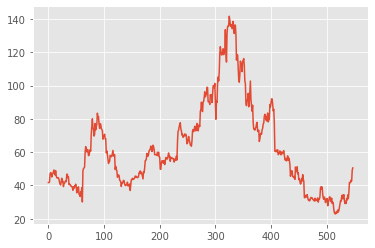

In [19]:
plt.plot(df["Close"])

In [20]:
yvals=np.array(df["Close"])
xvals=np.arange(0,yvals.shape[0])

In [21]:
coins=1000
cash=200000

In [22]:
net_assets_beginning=xvals[0]*1000+cash

In [23]:
net_assets_beginning

200000

In [24]:
preds=[]
preds.append(yvals[0])
preds.append(yvals[1])
preds.append(yvals[2])
preds.append(yvals[3])

In [25]:
import warnings

warnings.filterwarnings("ignore")

for i in np.arange(3,np.array(df["Close"]).shape[0],1):
    x_pairs=[]
    y_pairs=[]
    
    x_pairs.append(xvals[i-3])
    x_pairs.append(xvals[i-2])
    x_pairs.append(xvals[i-1])
    x_pairs.append(xvals[i])
    
    y_pairs.append(yvals[i-3])
    y_pairs.append(yvals[i-2])
    y_pairs.append(yvals[i-1])
    y_pairs.append(xvals[i])
    
    x_pairs=np.array(x_pairs).reshape(-1,1)
    y_pairs=np.array(y_pairs).reshape(-1,1)
    
    if i<np.array(df["Close"]).shape[0]-1:
        
        regression = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        
        regression.fit(x_pairs, y_pairs)
        
        pred=regression.predict(np.array([xvals[i+1]]).reshape(-1,1))
        
        preds.append(pred)
        
        if pred-yvals[i]>0:
            
            if coins==1000:
                
                pass
            
            else:
                
                coins=1000
                cash=cash-(1000*yvals[i]) 
        
        else:
            
            if coins==1000:
                
                coins=0
                cash=cash+(1000*yvals[i])
                
            else:
                
                pass
                
    else:
        
        pass

In [11]:
cash

342300.0

In [12]:
coins

1000

In [13]:
net_assets_end=cash+(coins*np.array(df["Close"])[-1])

In [14]:
net_assets_end

384000.0

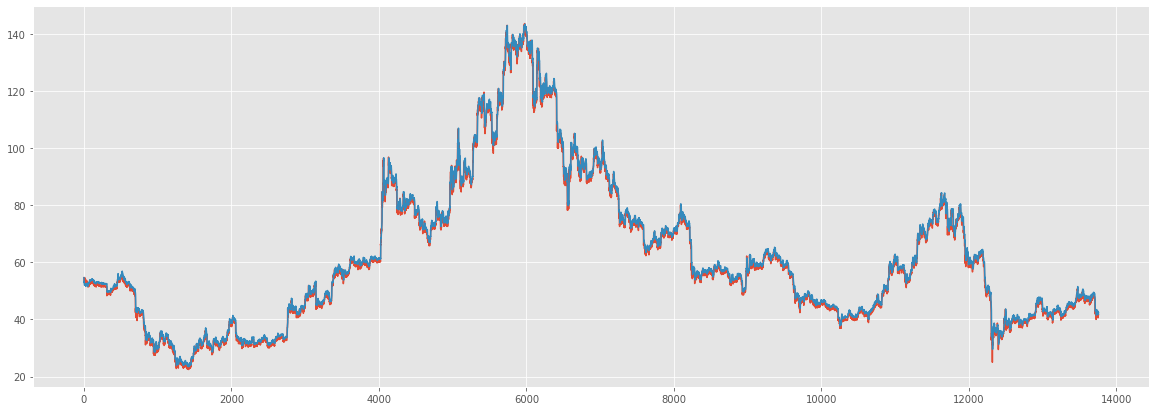

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(xvals,yvals)
plt.plot(xvals,preds)